# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [13]:
# load packages and modules
import numpy as np
from glob import glob

# the glob module is used to retrieve files/pathnames matching a specified pattern
# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


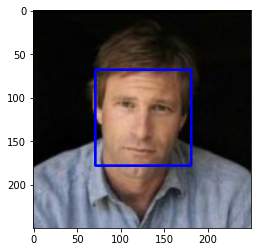

In [14]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [15]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

- The percentage of the first 100 images in `human_files` have a detected human face is 96% .  
- The percentage of the first 100 images in `dog_files` have a detected human face is 18%.

In [16]:
# Import tqdm module to make progress bar
from tqdm import tqdm

# create a numpy arrays with names "human_files_short" and "dog_files_short" with the first 100 images
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_images = 0
dogs_images = 0

# Use Python For loop to iterate over a sequence of elements (list, tuple, string), or other iterable objects.
# Use Python tdqm function() to make customisable progressbar decorator for iterator.

for human_img_path in tqdm(human_files_short, total=100, desc="Face Detector Progress"):
    if face_detector(human_img_path):
        human_images += 1
        
for dog_img_path in tqdm(dog_files_short, total=100, desc="Face Detector Progress"):
    if face_detector(dog_img_path):
        dogs_images += 1
        

print("Percent of the verified human images is: {} %.".format(human_images))
print("Percent of the verified dog images is: {} %.".format(dogs_images))

Face Detector Progress: 100%|██████████| 100/100 [00:24<00:00,  4.15it/s]

Percent of the verified human images is: 96 %.
Percent of the verified dog images is: 18 %.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [17]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [18]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [19]:
# Check if CUDA is available
use_cuda = torch.cuda.is_available()
if not use_cuda:
    print("CUDA is not available. Training on CPU...")
else:
    print("CUDA is available! Training on GPU...")

CUDA is not available. Training on CPU...


In [20]:
# print out the model structure
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [21]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Import image from img_path in PIL format
    img = Image.open(img_path)
    
    # All pre-trained models expect input images normalized in the same way,
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.
    # The images have to be loaded in to a range of [0, 1] d then normalized using mean = [0.485, 0.456, 0.406]
    # and std = [0.229, 0.224, 0.225].
    
    # normalized the transform data of images using mean and standard deviation.
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])    
    
    
    # define transformations of image
    transform = transforms.Compose([transforms.Resize(256),
                                    # Crops the given image at the center
                                    transforms.CenterCrop((224)),
                                    # Convert data to tensors
                                    transforms.ToTensor(),
                                    # Normalized the transformed data
                                    normalize])
    
    # transform image
    # Use torch.unsqueeze() method to change the tensor dimensions
    image = transform(img).unsqueeze_(0)
    
    # Move tensor to GPU if available
    if use_cuda:
        image = image.cuda()
    
           
    # get sample outputs
    output = VGG16(image)
    
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    prediction = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
 
   
    # predicted class index
    return prediction

In [22]:
VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

array(252, dtype=int64)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [23]:
## Check if the pre-trained model predicts an index between 151 and 268
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if VGG16_predict(img_path) >= 151 and VGG16_predict(img_path) <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- The percentage of the images in `human_files_short` have a detected dog is 0 %. 
- The percentage of the images in `dog_files_short` have a detected dog is 96 %.



**Image Augmentation**

- Augmentations such as RandomResizedCrop, RandomRotation, RandomHorizontalFlip are only supposed to be applied to training data, and are not supposed to used for validation and testing datasets.


- Augmentations help the model generalise better and prevent overfitting on training data. Since, dogs can be present in various poses in a picture, augmentating the training dataset should dramatically improve model performance.


- I do not use any augmentations on the input data such as RandomResizedCrop because of The training set uses many random augmentations (augmentations that use randomness usually have "random" in the name). However, the validation set only uses augmentations that don't introduce any randomness to the data.


- when you use normalization on the validation and test set I MUST use the same exact factors you used for the training set. The need to resize and then center crop comes from the fact the val set needs to come from the same domain of the train set, thus if the former was randomly resized and cropped to 224, the val set needs to deterministically resize and crop.

In [24]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Import tqdm module to make progress bar
from tqdm import tqdm

# the "human_files_short" and "dog_files_short" files with the first 100 images to calculate the percentage
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

# "human_files_short" and "dog_files_short" 
dogs_in_human_files = 0
dogs_in_dog_files = 0

# Use Python For loop to iterate over a sequence of elements (list, tuple, string), or other iterable objects.
# Use Python tdqm function() to make customisable progressbar decorator for iterator.
for file in tqdm(human_files_short, desc="Human Files"):
    if dog_detector(file):
        dogs_in_human_files += 1
        
for file in tqdm(dog_files_short, desc="Dog Files"):
    if dog_detector(file):
        dogs_in_dog_files += 1



print("Percent of dogs detected in the human_file_short is: ", dogs_in_human_files)
print("Percent of dogs detected in the dog_file_short is: ", dogs_in_dog_files)


Dog Files: 100%|██████████| 100/100 [02:04<00:00,  1.24s/it]

Percent of dogs detected in the human_file_short is:  0
Percent of dogs detected in the dog_file_short is:  94


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [25]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

**Convolutional Neural Networks, CNNs**

- In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural network, most commonly applied to analyze visual imagery.They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation equivariant responses known as feature maps. Counter-intuitively, most convolutional neural networks are only equivariant, as opposed to invariant, to translation. They have applications in image and video recognition, recommender systems, image classification, image segmentation, medical image analysis, natural language processing, brain-computer interfaces, and financial time series.

Resources: [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network).

**Applications of CNNs**
- CNNs achieve state of the art results in a variety of problem areas including `Voice User Interface`, `Natural Language Processing`, and `Computer Vision`.

In [33]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes



# number of subprocesses to use for data loading
num_workers = 0

# how many samples per batch to load
batch_size = 25

# convert data to torch.FloatTensor
transform = transforms.Compose([transforms.Resize(size=258),
                                # this transformation randomly flips an image along its horizontal axis
                                transforms.RandomHorizontalFlip(),
                                # this transformation randomly rotates an image by 10 degrees
                                transforms.RandomRotation(10),
                                # Crops the given image at the center
                                transforms.CenterCrop(224),
                                # Convert data to tensor
                                transforms.ToTensor(),
                                # normalized the transform data of images using mean and standard deviation.
                                transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])])

# Augmentations such as RandomResizedCrop, RandomRotation, RandomHorizontalFlip are only supposed to be applied to
# training data, and are not supposed to used for validation and testing datasets
valid_and_test_transform = transforms.Compose([transforms.Resize(size=258),
                                              # Crops the given image at the center
                                               transforms.CenterCrop(224),
                                              # Convert data to tensor
                                               transforms.ToTensor(),
                                              # normalized the transform data of images using mean and standard deviation.
                                               transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])])


# define training, validation, and testing data directory
# data_dir = '/data/dog_images/' # Udacity workspace
data_dir = 'dogImages'

# choose the training, validation, and test datasets
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
valid_data = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=valid_and_test_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=valid_and_test_transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)


loaders_scratch = {'train' : train_loader,'valid' : valid_loader,'test'  : test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

According to [VGG paper](https://arxiv.org/pdf/1409.1556.pdf), Very Deep Convolutional Networks for Large-Scale Image Recognition, by Karen Simonyan & Andrew Zisserman:

2.1 ARCHITECTURE
During training, the input to our ConvNets is a fixed-size 224 × 224 RGB image.
The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.
The image is passed through a stack of convolutional (conv.) layers, where we use filters with a very
small receptive field: 3 × 3 (which is the smallest size to capture the notion of left/right, up/down,
center). In one of the configurations we also utilise 1 × 1 convolution filters, which can be seen as
a linear transformation of the input channels (followed by non-linearity). The convolution stride is
fixed to 1 pixel; the spatial padding of conv. layer input is such that the spatial resolution is preserved
after convolution, i.e. the padding is 1 pixel for 3 × 3 conv. layers. Spatial pooling is carried out by
five max-pooling layers, which follow some of the conv. layers (not all the conv. layers are followed
by max-pooling). Max-pooling is performed over a 2 × 2 pixel window, with stride 2.

A stack of convolutional layers (which has a different depth in different architectures) is followed by
three Fully-Connected (FC) layers: the first two have 4096 channels each, the third performs 1000-
way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is
the soft-max layer. The configuration of the fully connected layers is the same in all networks.
All hidden layers are equipped with the rectification (ReLU (Krizhevsky et al., 2012)) non-linearity.
We note that none of our networks (except for one) contain Local Response Normalisation
(LRN) normalisation (Krizhevsky et al., 2012): as will be shown in Sect. 4, such normalisation
does not improve the performance on the ILSVRC dataset, but leads to increased memory consumption and computation time. Where applicable, the parameters for the LRN layer are those
of (Krizhevsky et al., 2012).

- How does your code resize the images (by cropping, stretching, etc)?
The code resize the images on 224x224, randomly flips an image along its horizontal axis, randomly rotates an image by 10 degrees, and crops the given image at the center. 


>The easiest way to load image data is with `datasets.ImageFolder` from `torchvision`. And when load in the data, I need to define some transforms to make all images at the same size for training. We can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`. Typically I combine these transforms into a pipeline with **transforms.Compose()**, which accept a list of transforms and runs them in sequence. It looks sometimes like to scale, then crop, then convert to a tensor. 


- What size did you pick for the input tensor, and why?

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
The image data by random rotation up to 10 degrees and by random horizontal flipping.

To obtain the fixed-size 224×224 ConvNet input images, they were randomly cropped from rescaled
training images (one crop per image per SGD iteration). To further augment the training set, the
crops underwent random horizontal flipping and random RGB colour shift (Krizhevsky et al., 2012).
Training image rescaling is explained below.

**How Computer Interpret Images?**

- Any gray scale image is interpreted by a computer as an array. A grid of values for each grid cell is called a pixel, and each pixel has a numerical value. For instance, each image in the MNIST database is 28 pixels high and wide. And so, it is understood by a computer as a 28 by 28 array.

- In a typical gray scale image, white pixels are encoded as the value of 255 and black pixels are encoded as zero. Gray pixels fall somewhere in between, with light-gray being closer to 255. 

**Normalization**

- In pre-processing step, It have been re-scaled so that each image has pixel values in a range from zero to one, as opposed to from zero to 255. To go from a range of zero-255 to zero to one, It just have divide every pixel value by 255. This step is called normalization, and it is common practice in many deep learning techniques.

- Normalization will help our algorithm to train better. The reason we typically  want normalized pixel values is because neural networks rely on gradient calculations. These networks are trying to learn how important or how weightly a certain pixel should be in determining the class of an image.

- Normalizing the pixel values helps these gradient calculations stay consistent, and not get so large that they slow down or prevent a network from training.

- In other words, data normalization is an important pre-processing step. It ensures that each input comes from a standard distribution. That is, the range of pixel values in one input image are the same as the range in another image. This standardization makes the model train and reach a minimum error, faster! 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [34]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer
        self.layer1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=3, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        # convolutional layer
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        # linear layer
        self.fc1 = nn.Linear(56*56*32, 133)
        # linear layer
        self.fc2 = nn.Linear(1024, 133)

    def forward(self, x):
        ## Define forward behavior
        x = self.layer1(x)
        x = self.layer2(x)
        
        # flatten image input
        x = x.view(x.size(0), -1)
        x = self.fc1(x)

        return x
        
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

According to [VGG paper](https://arxiv.org/pdf/1409.1556.pdf), Very Deep Convolutional Networks for Large-Scale Image Recognition, by Karen Simonyan & Andrew Zisserman:

- Building networks with Pytorch, Pytorch provides a module **nn** that makes building networks much simplier.
- The `class Net(nn.module)` combined with `super(). __init__()` which creates a class that tracks the architecture, 
and provides a lot of useful methods and attributes. It is mandatory to inherit from `nn.Module` when creating a class for the network. The name of the class itself can be anything.

- the input to the model is a 224 by 224 by 3 tensor, which accounts for the 224x224 images with 3 color channels each (RGB).
- The torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros') class applies a 2D convolution over an input signal composed of several input planes.
> The parameters of the torch.nn.Conv2d() class are:
- in_channels: refers to the depth of an input. For a grayscale image, this depth = 1, and 3 for 3 color channel.
- out_channels: refers to the desired depth of the output, or the number of filtered images you want to get as output.
- kernel_size: is the size of the convolutional kernel (most commonly 3 for a 3 x 3 kernel).
- stride and padding have default values, but should be set depending on how large you want the output to be in the spatial dimensions x, y.


> Pooling layers

- Maxpooling layers commonly come after convolutional layers to shrink the x-y dimensions of an input.
- Use torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False) class to applies a 2D max pooling over an input signal composed of several input planes.


**Layers in Convolutional Neural Networks (CNNs)**

- Input layer
- Convo layer (Convo + ReLU)
- Pooling layer
- Fully connected(FC) layer
- Softmax/logistic layer
- Output layer

**Stride and Padding**

**Stride**

- **Stride** denotes how many steps we are moving in each steps in convolution.By default it is one.

**Padding**

- We can observe that the size of output is smaller that input. To maintain the dimension of output as in input , we use padding. **Padding** is a process of adding zeros to the input matrix symmetrically. Padding is just adding a border of pixels around an image.

**ReLU Activation function**

- In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. For examples, Sigmoid function,Hyperbolic Tangent, and Rectified Linear Unit (ReLU). 

- The purpose of an activation function is to scale the outputs of a layer so that they are a consistent, small value. Much like normalizing input values, this step ensures that the model trains efficiently!


**Sigmoid function** used as Activation function to introduce non-linearity after hidden layers and when we need outputs to be between 0 and 1.


**Hyperbolic Tangent** It defined as the ratio between the hyperbolic sine and the cosine functions.
In neural networks, as an alternative to sigmoid function, hyperbolic tangent function could be used as activation function. 
It is similar to sigmoid function, but since the range is between minus one and one, the derivatives are larger.

**Rectified Linear Unit (ReLU)** 

- The rectified linear activation function or ReLU for short is a very simple function, It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

- It is one of the most commonly used activation functions for hidden layers. However, it simply defined as the positive part of the input, x, so for an input image with any negative pixel values, this would turn all those values to 0, black.


In [35]:
# Print out the model architecture
print(model_scratch)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=100352, out_features=133, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
)


In [36]:
# Torch-summary provides information complementary to what is provided by print(your_model) in PyTorch
# from torchsummary import summary
# summary(model_scratch,(3,224,224))

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [37]:
import torch.optim as optim

### TODO: select loss function
# This criterion combines LogSoftmax and NLLLoss in one single class.
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# torch.optim is a package implementing various optimization algorithms.
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [38]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients of all optimized variables
            optimizer.zero_grad()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass:compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update running training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))      
                   
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
        
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.999292 	Validation Loss: 4.866088
Validation loss decreased (inf --> 4.866088). Saving model...
Epoch: 2 	Training Loss: 4.849088 	Validation Loss: 4.862776
Validation loss decreased (4.866088 --> 4.862776). Saving model...
Epoch: 3 	Training Loss: 4.713066 	Validation Loss: 4.752430
Validation loss decreased (4.862776 --> 4.752430). Saving model...
Epoch: 4 	Training Loss: 4.316096 	Validation Loss: 4.786584
Epoch: 5 	Training Loss: 3.828163 	Validation Loss: 5.035866
Epoch: 6 	Training Loss: 3.348884 	Validation Loss: 5.248238
Epoch: 7 	Training Loss: 2.968025 	Validation Loss: 5.252943
Epoch: 8 	Training Loss: 2.553046 	Validation Loss: 5.689471
Epoch: 9 	Training Loss: 2.215205 	Validation Loss: 5.952076
Epoch: 10 	Training Loss: 1.911162 	Validation Loss: 6.207492
Epoch: 11 	Training Loss: 1.676401 	Validation Loss: 6.388470
Epoch: 12 	Training Loss: 1.417122 	Validation Loss: 6.819995
Epoch: 13 	Training Loss: 1.302958 	Validation Loss: 6.680243
Epoch: 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [39]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
            
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.734216


Test Accuracy:  3% (31/836)


- The trained model attains at least 10% accuracy on the test set.
- The model's accuracy relies on its architecture and training methodology.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [1]:
# Load packages and modules
import os
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models

In [4]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [5]:
## TODO: Specify data loaders


# number of subprocesses to use for data loading
num_workers = 0

# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.Compose([transforms.Resize(size=255),
                                # this transformation randomly flips an image along its horizontal axis
                                transforms.RandomHorizontalFlip(),
                                # this transformation randomly rotates an image by 10 degrees
                                transforms.RandomRotation(10),
                                # Crops the given image at the center
                                transforms.CenterCrop(224),
                                # Convert data to tensor
                                transforms.ToTensor(),
                                # normalized the transform data of images using mean and standard deviation.
                                transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])])


# Augmentations such as RandomResizedCrop, RandomRotation, RandomHorizontalFlip are only supposed to be applied to
# training data, and are not supposed to used for validation and testing datasets
valid_and_test_transform = transforms.Compose([transforms.Resize(size=258),
                                              # Crops the given image at the center
                                               transforms.CenterCrop(224),
                                              # Convert data to tensor
                                               transforms.ToTensor(),
                                              # normalized the transform data of images using mean and standard deviation.
                                               transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])])

# define training, validation, and testing data directory
# data_dir = '/data/dog_images/' # Udacity workspace
data_dir = 'dogImages'

# choose the training, validation, and test datasets
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
valid_data = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=valid_and_test_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=valid_and_test_transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)


loaders_scratch = {'train' : train_loader,'valid' : valid_loader,'test'  : test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [6]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# download VGG16 pretrained model, I will not need the "classifier" portion
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

# get the number of dog classes from the train_dataset
number_of_dog_classes = len(train_data.classes)
    

# Define dog breed classifier part of model_transfer
classifier = nn.Sequential(nn.Linear(25088, 4096),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(4096, 512),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(512, number_of_dog_classes))


# Rplace the original classifier with the dog breed classifier from above
model_transfer.classifier = classifier


if use_cuda:
    model_transfer = model_transfer.cuda()

In [7]:
# print out the model structure
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

**What is a Pre-trained Model?**

A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.


**Why use a Pre-trained Model?**

Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.


**Transfer Learning**

Define and train the CNN architectures like VGG and ResNet with a number of specified layers and hyperparameters, which they have been trained on the very large ImageNet database, which has more than 1000 object classes.

Transfer learning is all about how to use a pre-trained network and apply it a task of your own design, transfering what it is learned from one task to another.

There are a few ways to implement transfer learning, and your approach will depend on how similar a dataset is to the dataset that a pretrained network has seen. In other words, how transferable can certain knowledge be?

The VGG networks have learned to distinguish between the thousand different categories that are present in ImageNet, most of those category are animals, fruits and vegetables, or everyday objects. However, the VGG trained each of its convolutional layers learn to extract some information about the shapes and colors that distinguish these different objects.

In fact, the convolutional filters in a trained CNN are arranged in a kind of hierarchy. The Filters in the first layer often detect edges or blocks of color. The second layer might detect circles, stripes, and rectangles. These are still very general features that are useful in analyzing and image is almost any dataset. The filters in the final convolutional layers are much more specific if they were birds in the training dataset, there are filters that can detect birds. If they were cars or bicycles, there are filters to detect wheels and so on.

When we perform transfer learning, I have to shape my input data into the shape that the pre-trained model expects. VGG16 expects 224 -dim square images as input and so, we resize each image to fit this model.


**Nural Style Transfer**


Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.


**Separating Style and Content**

Style transfer relies on separating the content and style of an image. Given one content image and one style image, we aim to create a new, _target_ image which should contain our desired content and style components:
* objects and their arrangement are similar to that of the **content image**
* style, colors, and textures are similar to that of the **style image**


**I follow this steps to define a model for training**

- I load the pretrained model from PyTorch (model_transfer = models.vgg16(pretrained=True))

- Freeze parameters of the model to avoid brackpropagation

> for param in model_transfer.parameters():
    param.requires_grad = False
    
**Final classifier Layer**

Once you have the pre-trained feature extractor, I need to modify and /or add to the final, fully-connected classifier layers.
I replace the original classifier with the dog breed classifier.

I use torch.nn.Sequential(*args) class
Modules will be added to it in the order they are passed in the constructor.
Alternatively, an ordered dict of modules can also be passed in.


> Models pre-trained on ImageNet database are very good feature extractors already. So, we mostly need to change the dense layers and retrain the network while freezing the convolution layer parameters and only training the fully-connected layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [8]:
# Specify Loss function and Optimizer

# I use CrossEntrophyLoss() function,
criterion_transfer = nn.CrossEntropyLoss()

# I use optimizier (Stochastic gradient descent) with a small learning rate (0.001)
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
# train the model
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        with torch.no_grad():
            model.eval()
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # update average validation loss 
                valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# define loaders_transfer
loaders_transfer = {'train': train_loader,'valid': valid_loader,'test': test_loader}

n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda,'model_transfer.pt')



# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.967567 	Validation Loss: 4.591820
Validation loss decreased (inf --> 4.591820).  Saving model ...
Epoch: 2 	Training Loss: 4.743491 	Validation Loss: 4.685663
Epoch: 3 	Training Loss: 4.605531 	Validation Loss: 4.111243
Validation loss decreased (4.591820 --> 4.111243).  Saving model ...
Epoch: 4 	Training Loss: 4.565678 	Validation Loss: 4.008696
Validation loss decreased (4.111243 --> 4.008696).  Saving model ...
Epoch: 5 	Training Loss: 4.499596 	Validation Loss: 4.077396
Epoch: 6 	Training Loss: 4.448702 	Validation Loss: 3.845810
Validation loss decreased (4.008696 --> 3.845810).  Saving model ...
Epoch: 7 	Training Loss: 4.415637 	Validation Loss: 3.797384
Validation loss decreased (3.845810 --> 3.797384).  Saving model ...


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 3.744650


Test Accuracy:  7% (64/836)


- The trained model attains at least 60 % accuracy on the test set.
- The model's accuracy relies on its architecture and training methodology.

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [37]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

# get the model with the best trained weights
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# the "predict_breed_transfer" function is define to take the file path as input and return the breed predicted by the CNN

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)

    # Define normalization step for image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))

    # Define transformations of image
    transform = transforms.Compose([transforms.Resize(258),
                                    # Crops the given image at the center
                                     transforms.CenterCrop(224),
                                    # Convert data to tensor
                                     transforms.ToTensor(),
                                    # normalized the transform data of images using mean and standard deviation.
                                     normalize])

    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = transform(img).unsqueeze_(0)

    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    # Turn on evaluation mode
    model_transfer.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        output = model_transfer(img_tensor)
        prediction = torch.argmax(output).item()
        
    # Turn off evaluation mode
    model_transfer.train()
    
    # Use prediction to get dog breed
    breed = class_names[prediction]
    
    return breed


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [42]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    plt.imshow(Image.open(img_path))
    plt.axis('off') 
    plt.show()
    
    if dog_detector(img_path):
        print('It is a dog image!')
        print(f'\nThe dog breed... {predict_breed_transfer(img_path)}')

    elif face_detector(img_path):
        print('It is a human image! You resemble Labrador dog breed')
        print(f'\nThe dog breed... {predict_breed_transfer(img_path)}')
                
    else:
        print('It is neither human nor dog image')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- Using convolutional neural networks improve face detector algorithm.
- Using transfer learning on pre-trained CNN improve dog detector algorithm.
- By increasing the number of epochs of training, will improve overall image detector.
- Adding more layers will help as the depth of convolutions increase, models can learn more features. But, this means training time will also increase considerably.
- Adam is usually a good optimizer for most cases and a standard learning rate of around 0.001 or 0.0005 works well.
- Higher epochs help with learning although at one point the learning would stop as the model becomes really good and starts overfitting.

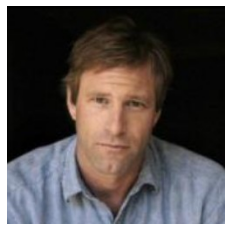

It is a human image! You resemble Labrador dog breed

The dog breed... Cane corso


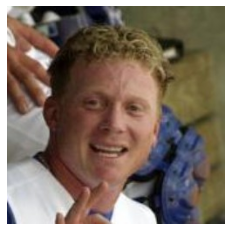

It is a human image! You resemble Labrador dog breed

The dog breed... Cane corso


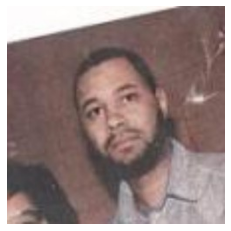

It is neither human nor dog image


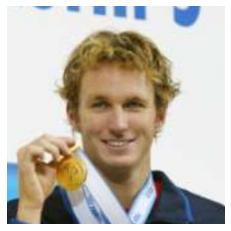

It is a human image! You resemble Labrador dog breed

The dog breed... Dalmatian


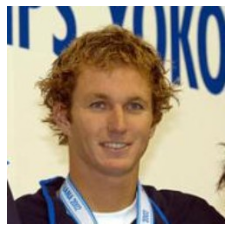

It is a human image! You resemble Labrador dog breed

The dog breed... Golden retriever


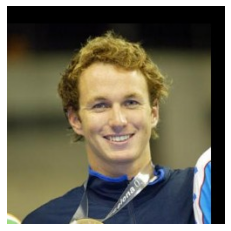

It is a human image! You resemble Labrador dog breed

The dog breed... Golden retriever


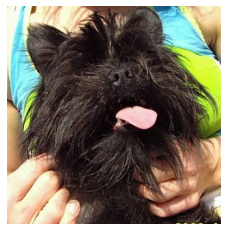

It is a dog image!

The dog breed... Brussels griffon


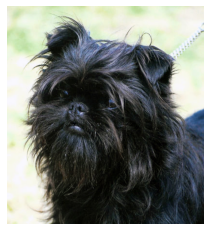

It is a dog image!

The dog breed... Brussels griffon


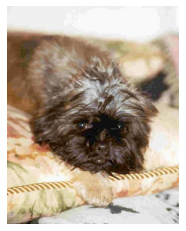

It is a dog image!

The dog breed... Brussels griffon


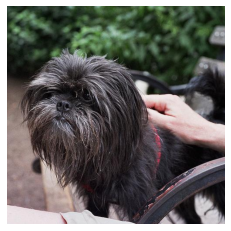

It is a dog image!

The dog breed... Silky terrier


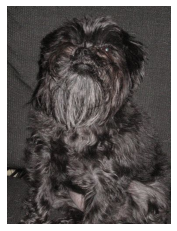

It is a dog image!

The dog breed... Brussels griffon


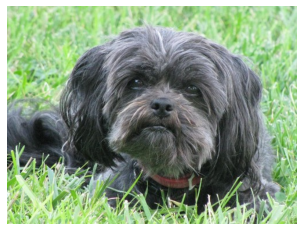

It is a dog image!

The dog breed... Silky terrier


In [43]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:6], dog_files[:6])):
    run_app(file)

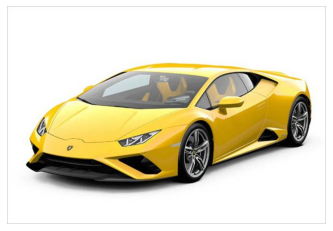

It is neither human nor dog image


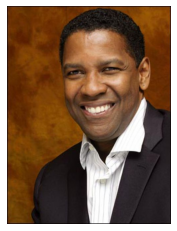

It is a human image! You resemble Labrador dog breed

The dog breed... Cane corso


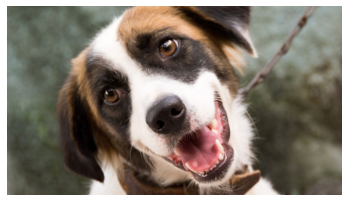

It is a dog image!

The dog breed... English cocker spaniel


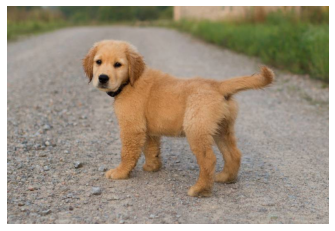

It is a dog image!

The dog breed... Golden retriever


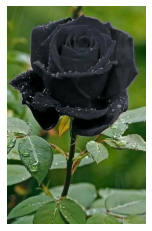

It is neither human nor dog image


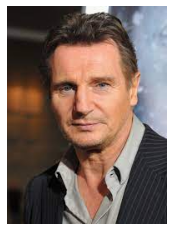

It is a human image! You resemble Labrador dog breed

The dog breed... American staffordshire terrier


In [44]:
# load packages and modules
import numpy as np
from glob import glob

# load filenames
files = np.array(glob("my_images/*"))

for file_path in files:
    run_app(file_path)